## LoanStatNew	Description
**loan_amnt:	 The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
    
**term:	The number of payments on the loan. Values are in months and can be either 36 or 60.
    
**int_rate:	Interest Rate on the loan

**installment:	The monthly payment owed by the borrower if the loan originates.

**grade:	LC assigned loan grade

**sub_grade:	LC assigned loan subgrade

**emp_title:	The job title supplied by the Borrower when applying for the loan.

**emp_length:	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

**home_ownership:	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

**annual_inc:	The self-reported annual income provided by the borrower during registration.

**verification_status:	Indicates if income was verified by LC, not verified, or if the income source was verified

**issue_date:	The month which the loan was funded

**loan_status:	Current status of the loan

**purpose:	A category provided by the borrower for the loan request.

**title:	The loan title provided by the borrower

**zip_code:	The first 3 numbers of the zip code provided by the borrower in the loan application.

**addr_state:	The state provided by the borrower in the loan application

**dti:	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**earliest_cr_line:	The month the borrower's earliest reported credit line was opened

**open_acc:	The number of open credit lines in the borrower's credit file.

**pub_rec:	Number of derogatory public records

**revol_bal:	Total credit revolving balance

**revol_util:	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc:	The total number of credit lines currently in the borrower's credit file

**initial_list_status:	The initial listing status of the loan. Possible values are – W, F

**application_type:	Indicates whether the loan is an individual application or a joint application with two co-borrowers

**mort_acc:	Number of mortgage accounts.

**pub_rec_bankruptcies:	Number of public record bankruptcies

In [1]:
#bult_in library
import itertools
import warnings
import re
from typing import Union, Optional, Sequence

warnings.filterwarnings("ignore")

#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pandas setting
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

#import of packages
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [2]:
df= pd.read_csv("lending_club_loan_two.csv")

print(f"shape of df: {df.shape}\n")

df.head()

shape of df: (396030, 27)



,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


## EXPLORATORY DATA ANALYSIS

In [3]:
#checking what the dataset contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [4]:
#checking the description of the dataset
df.describe

<bound method NDFrame.describe of         loan_amnt        term  int_rate  installment grade sub_grade   
0         10000.0   36 months     11.44       329.48     B        B4  \
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc   
0                      Mark

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
#checking for missing values
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
#checking the type of the dataset
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [8]:
#checking the number of each unique features
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [9]:
#checking if any of our data is duplicated in the dataset
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029    False
Length: 396030, dtype: bool

In [10]:
df.loc[df.duplicated()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address


In [11]:
#checking the value count of the loan status which is the target variable
df["loan_status"].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

<Axes: xlabel='loan_status', ylabel='count'>

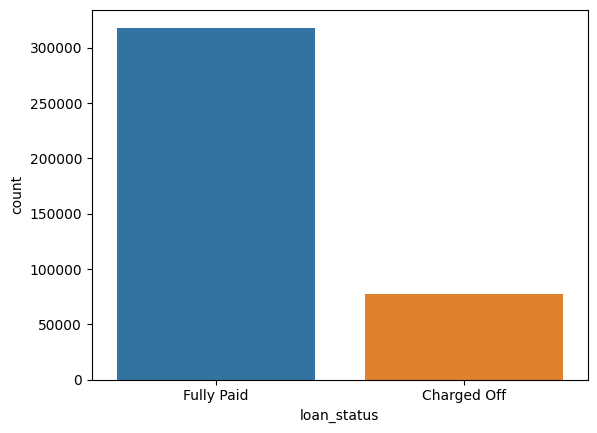

In [12]:
#visualizing the target variable using countplot, where charged off means defaulted
sns.countplot( x = "loan_status", data = df)

In [13]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<Axes: xlabel='installment', ylabel='Density'>

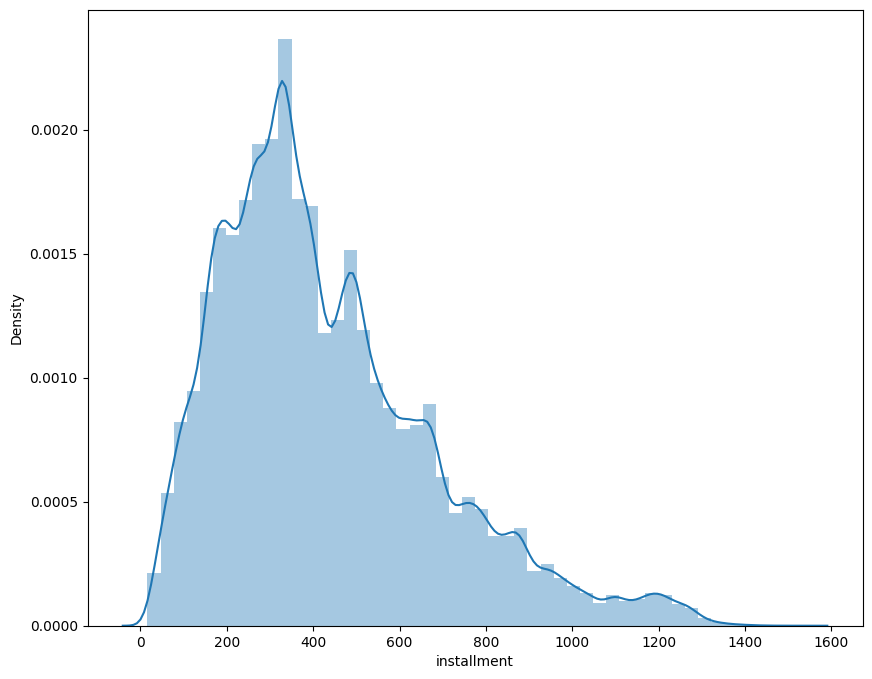

In [14]:
#visualization of the installment payment 
plt.figure(figsize = (10,8))
sns.distplot(df['installment'], bins = 50)

<Axes: xlabel='int_rate', ylabel='Density'>

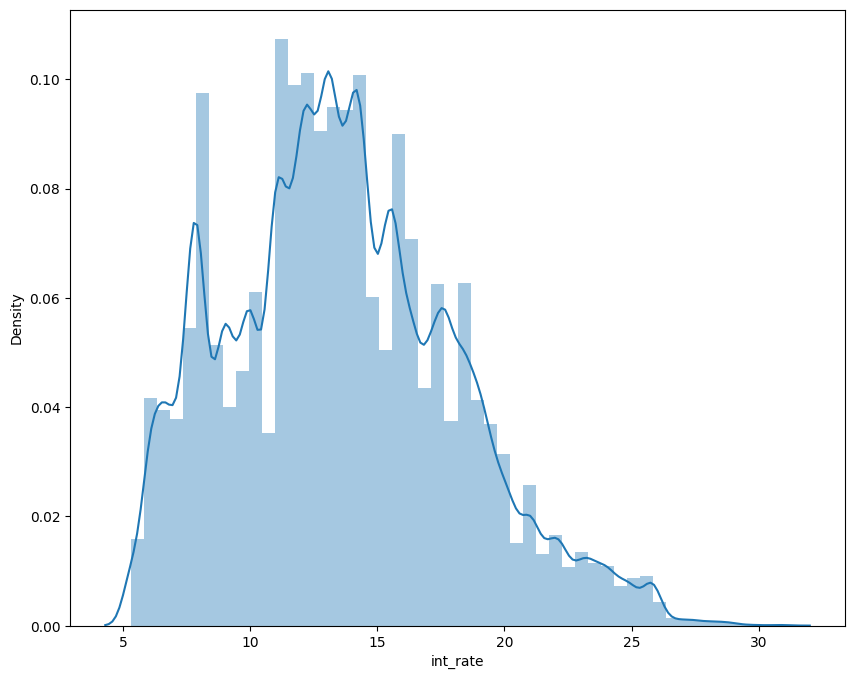

In [15]:
#visualization of the installment payment 
plt.figure(figsize = (10,8))
sns.distplot(df['int_rate'], bins = 50)

<Axes: xlabel='open_acc', ylabel='Density'>

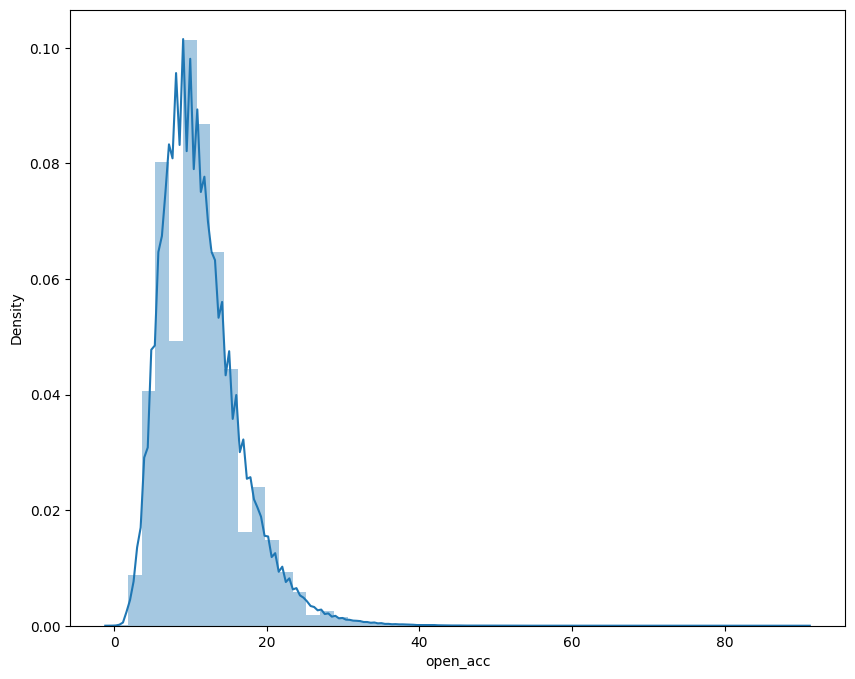

In [16]:
#visualization of the installment payment 
plt.figure(figsize = (10,8))
sns.distplot(df['open_acc'], bins = 50)

<Axes: xlabel='loan_amnt', ylabel='Density'>

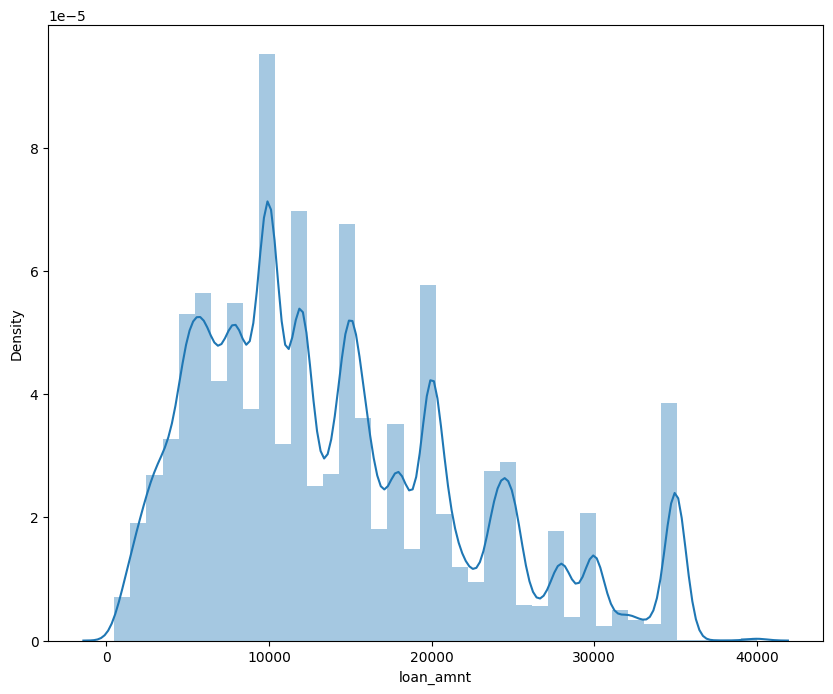

In [17]:
#visualization of the loan_amnt 
plt.figure(figsize = (10,8))
sns.distplot(df['loan_amnt'], bins = 40)

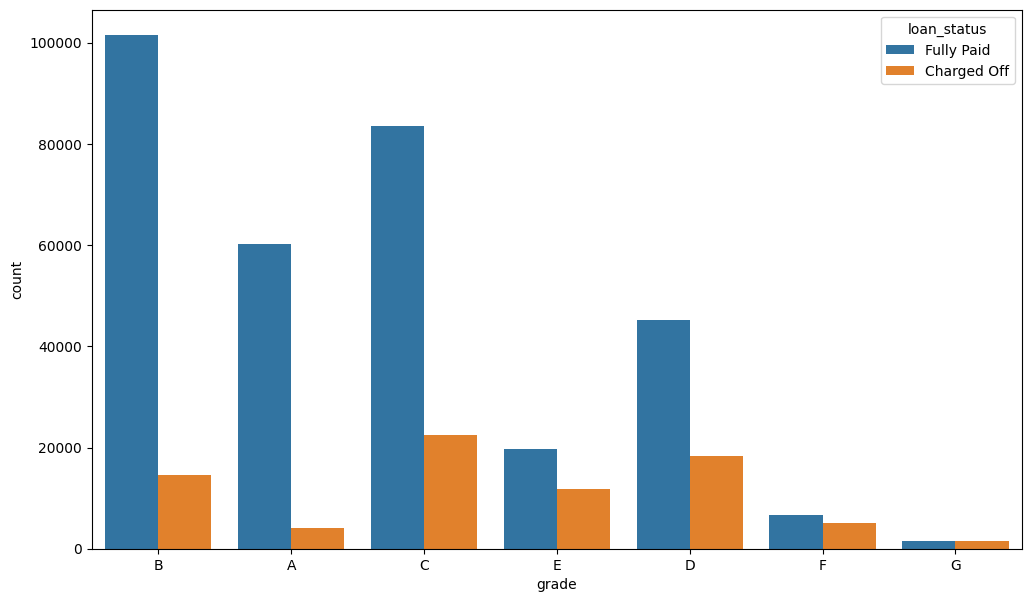

In [18]:
#checking for relationship between the grade and loan status
plt.figure(figsize =  (12,7))
sns.countplot(
    x = 'grade',
    hue="loan_status",
data = df)
plt.show()

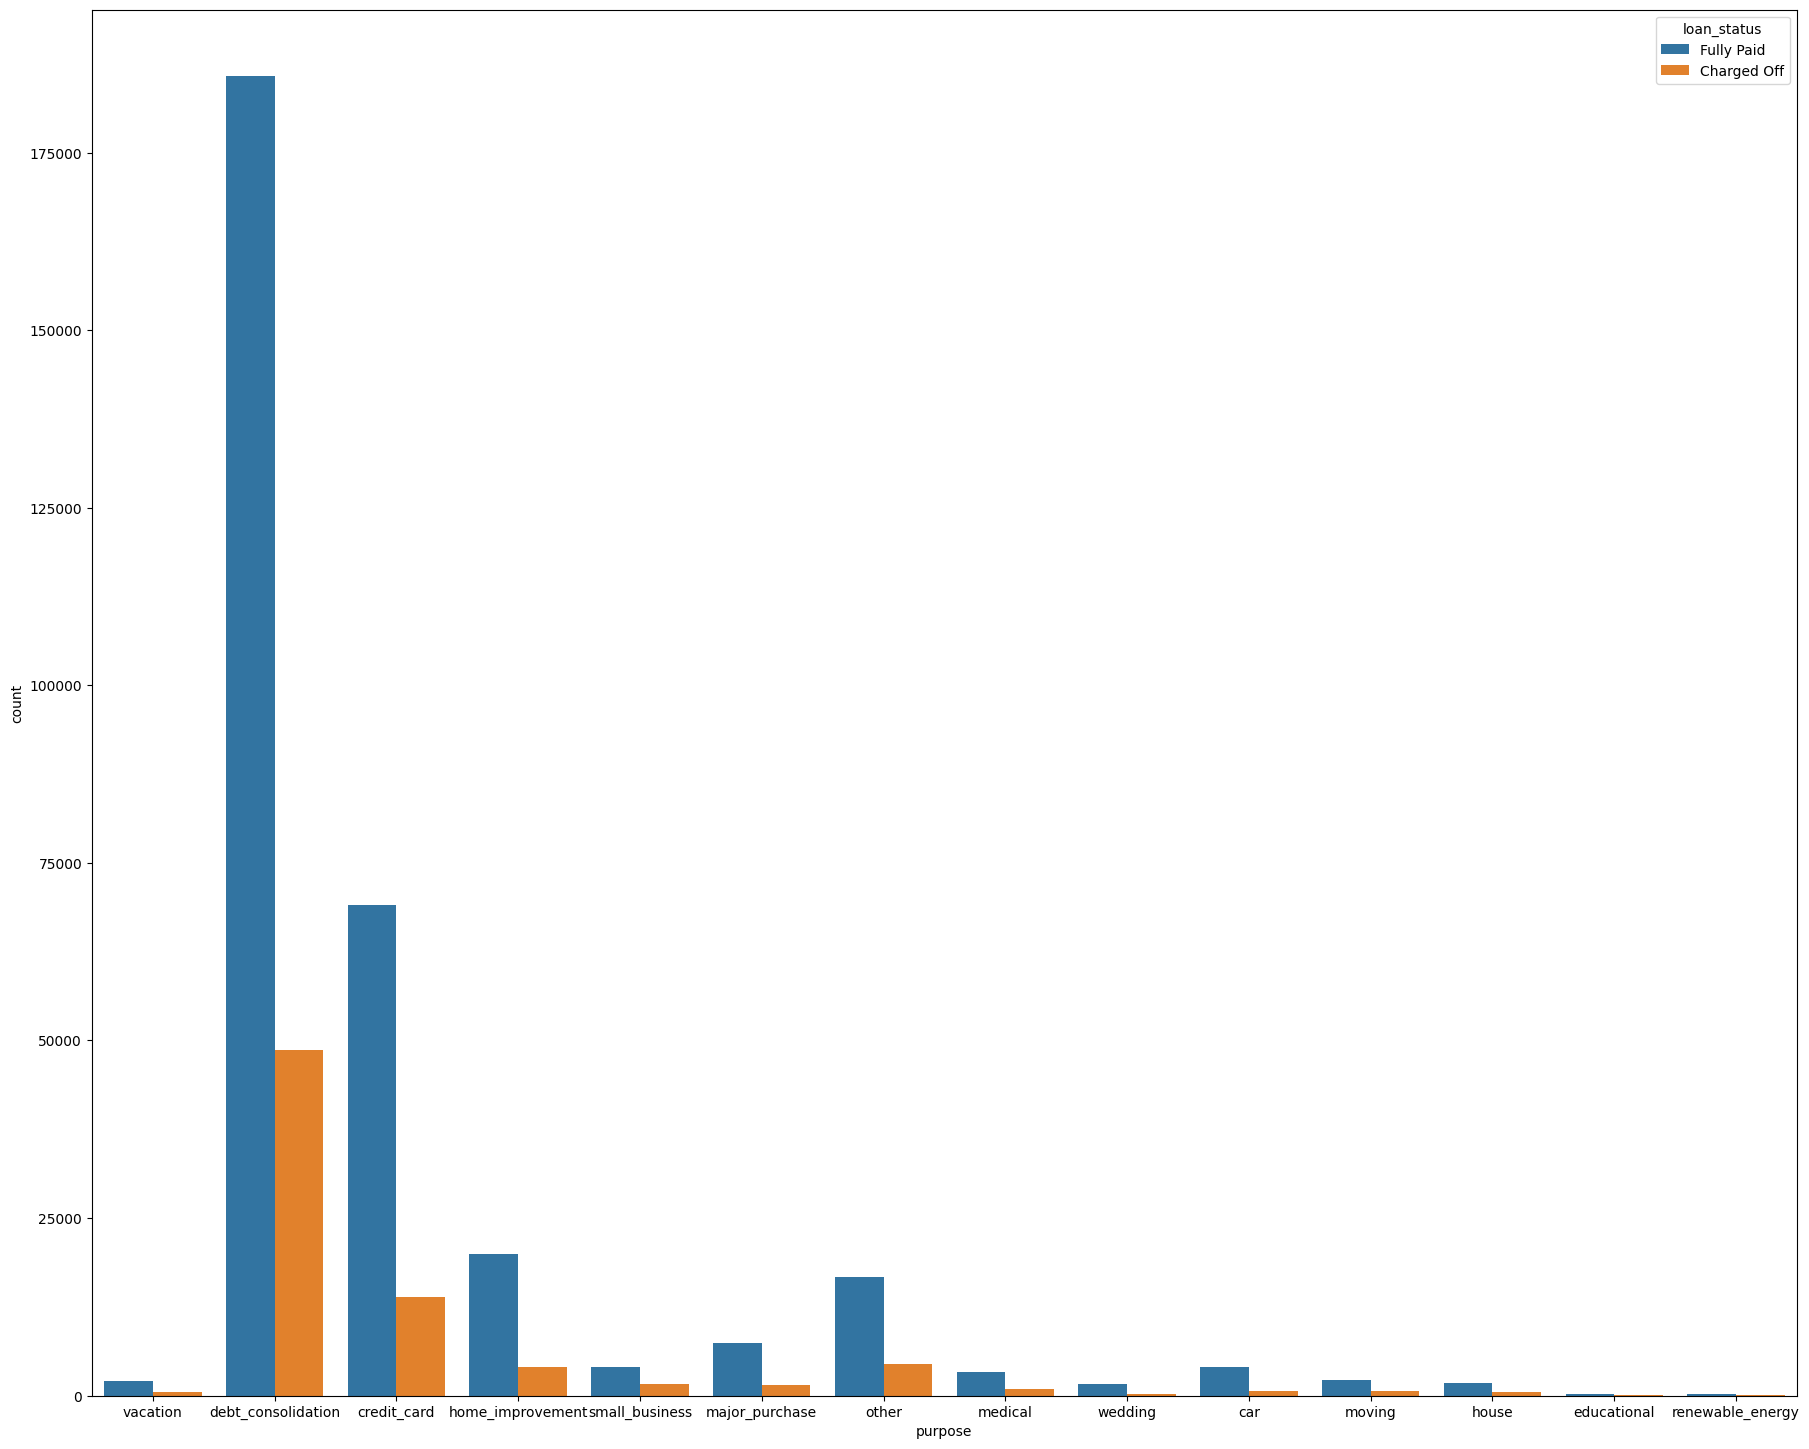

In [19]:
#checking for relationship between the purpose and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'purpose',
    hue="loan_status",
data = df)
plt.show()

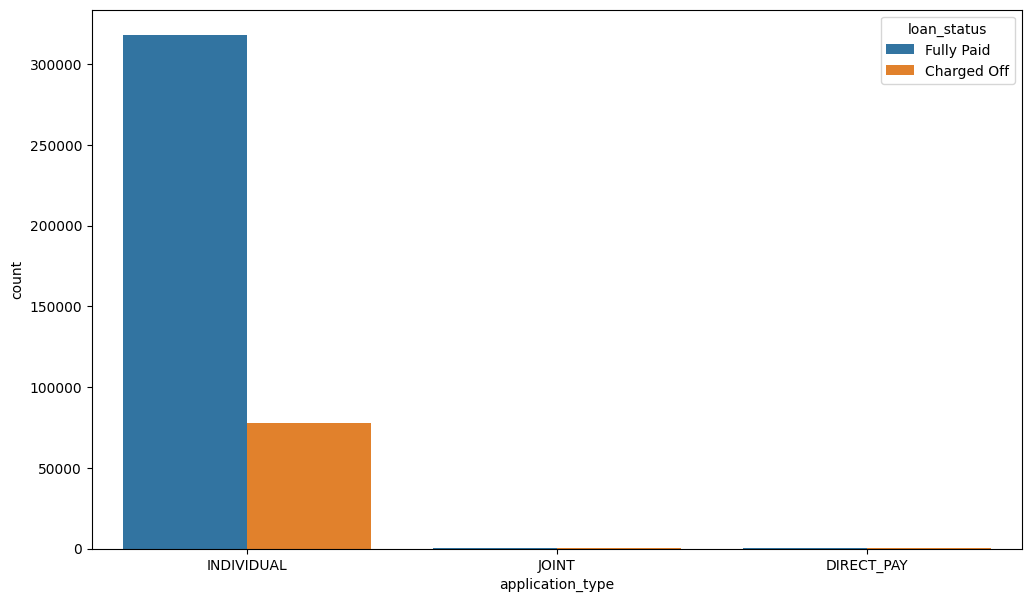

In [20]:
#checking for relationship between the application_type and loan status
plt.figure(figsize =  (12,7))
sns.countplot(
    x = 'application_type',
    hue="loan_status",
data = df)
plt.show()

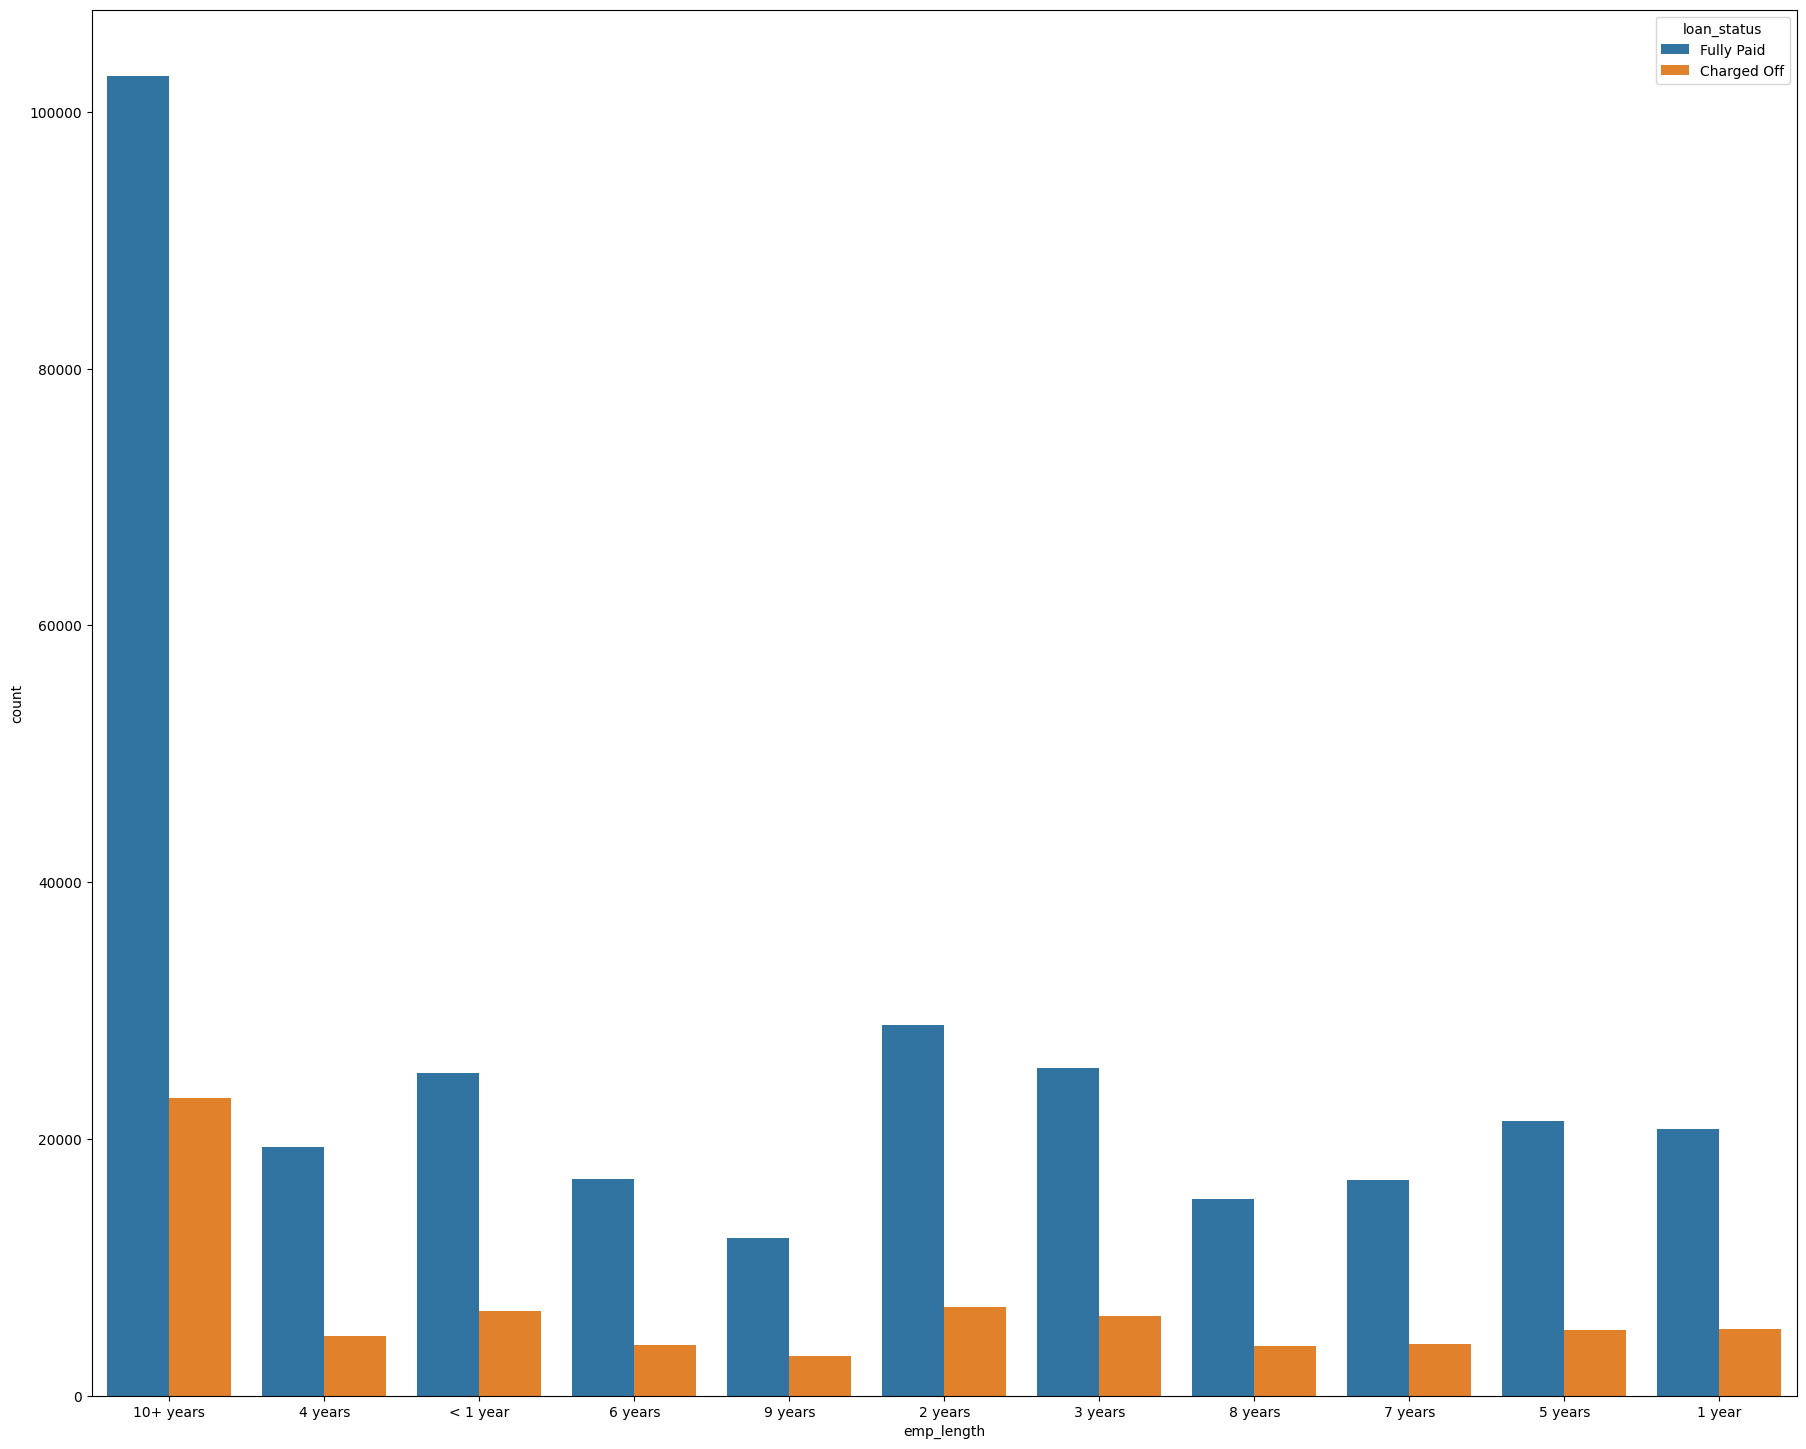

In [21]:
#checking for relationship between the emp_length and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'emp_length',
    hue="loan_status",
data = df)
plt.show()

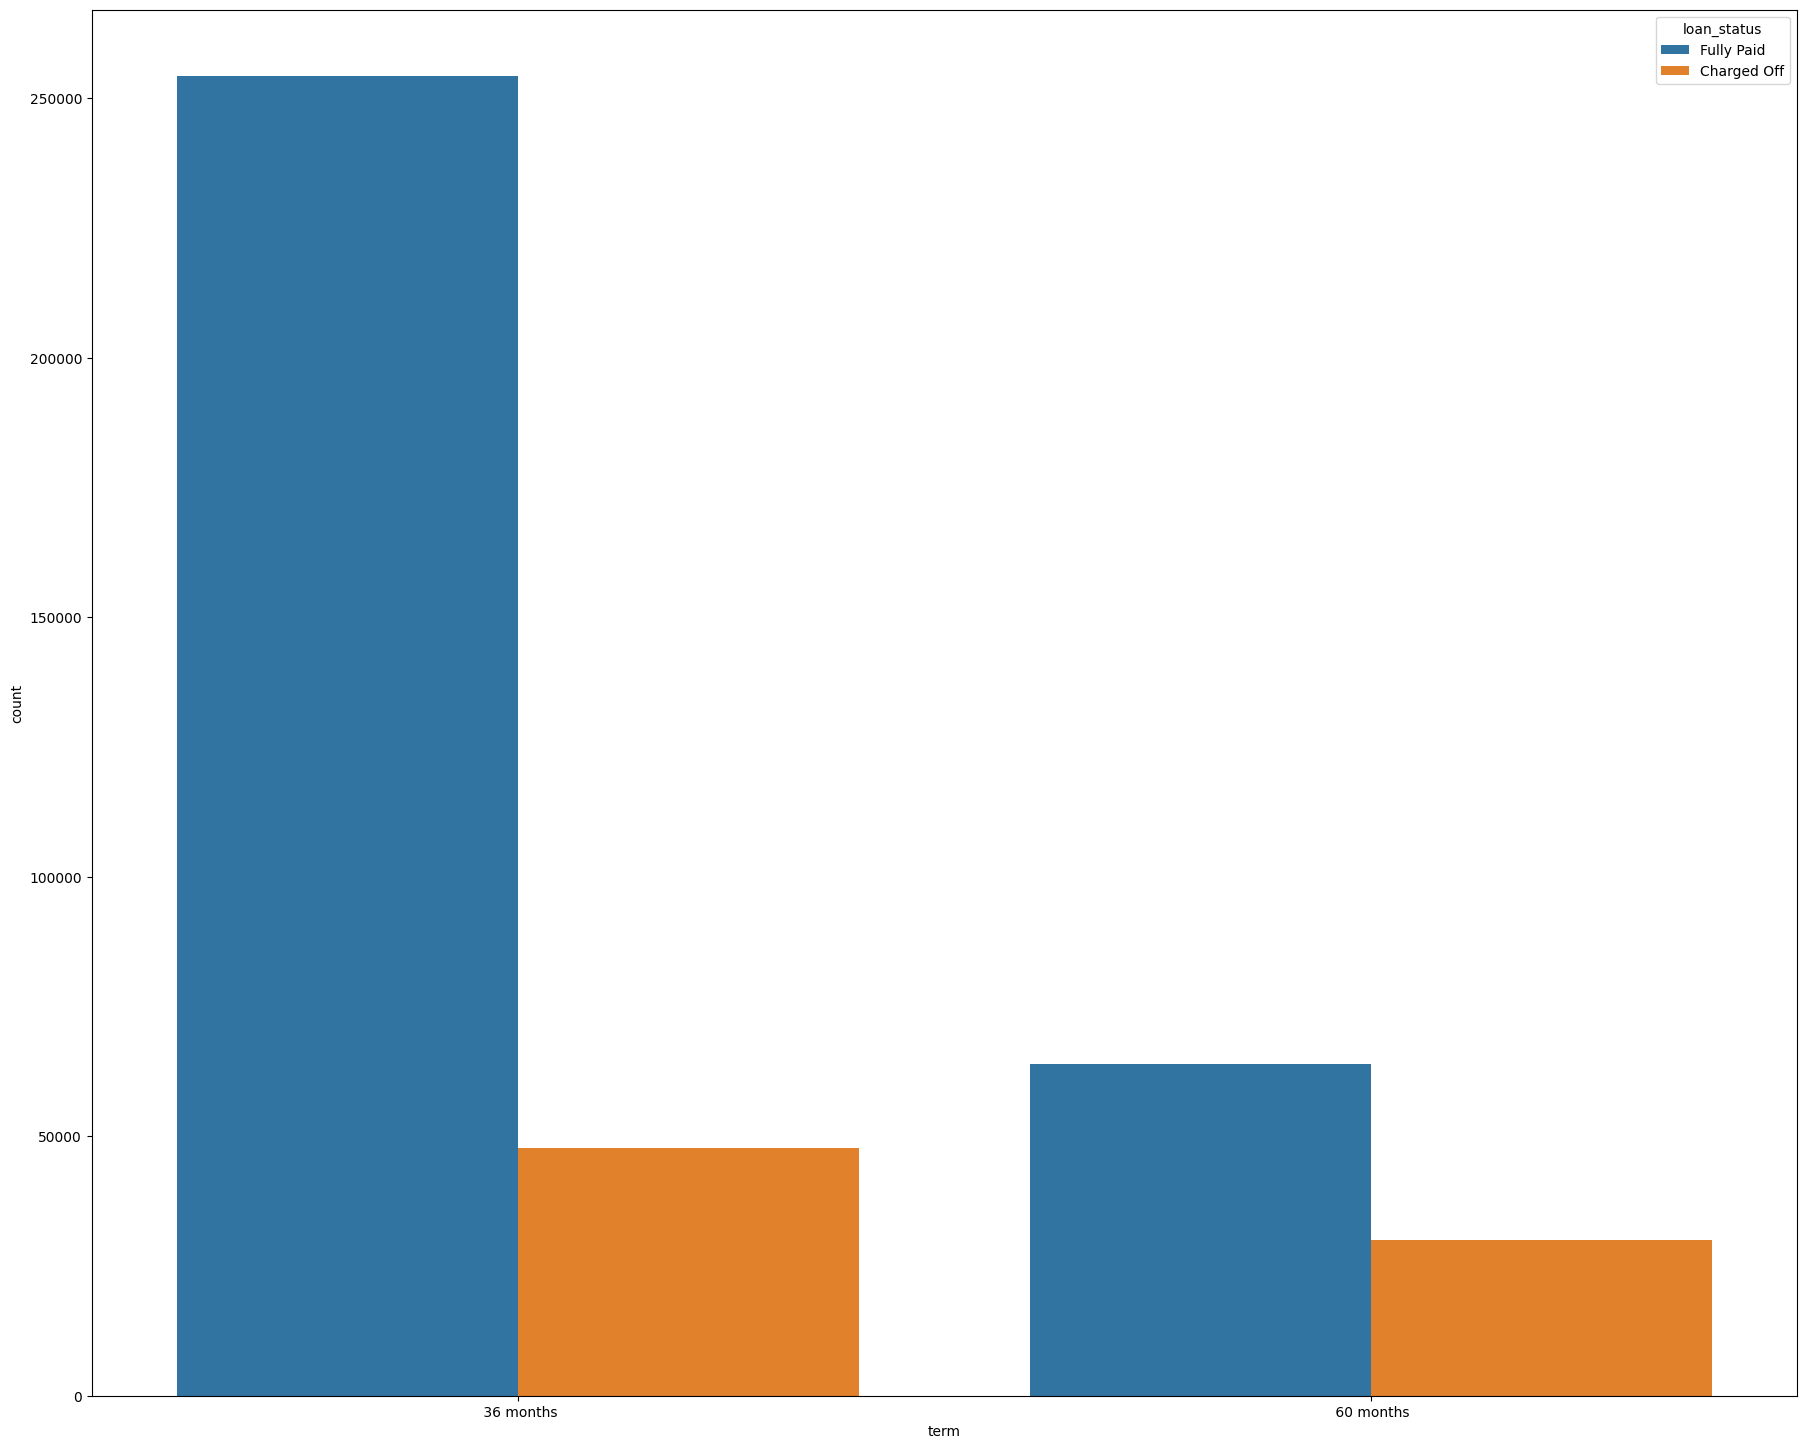

In [22]:
#checking for relationship between term and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'term',
    hue="loan_status",
data = df)
plt.show()

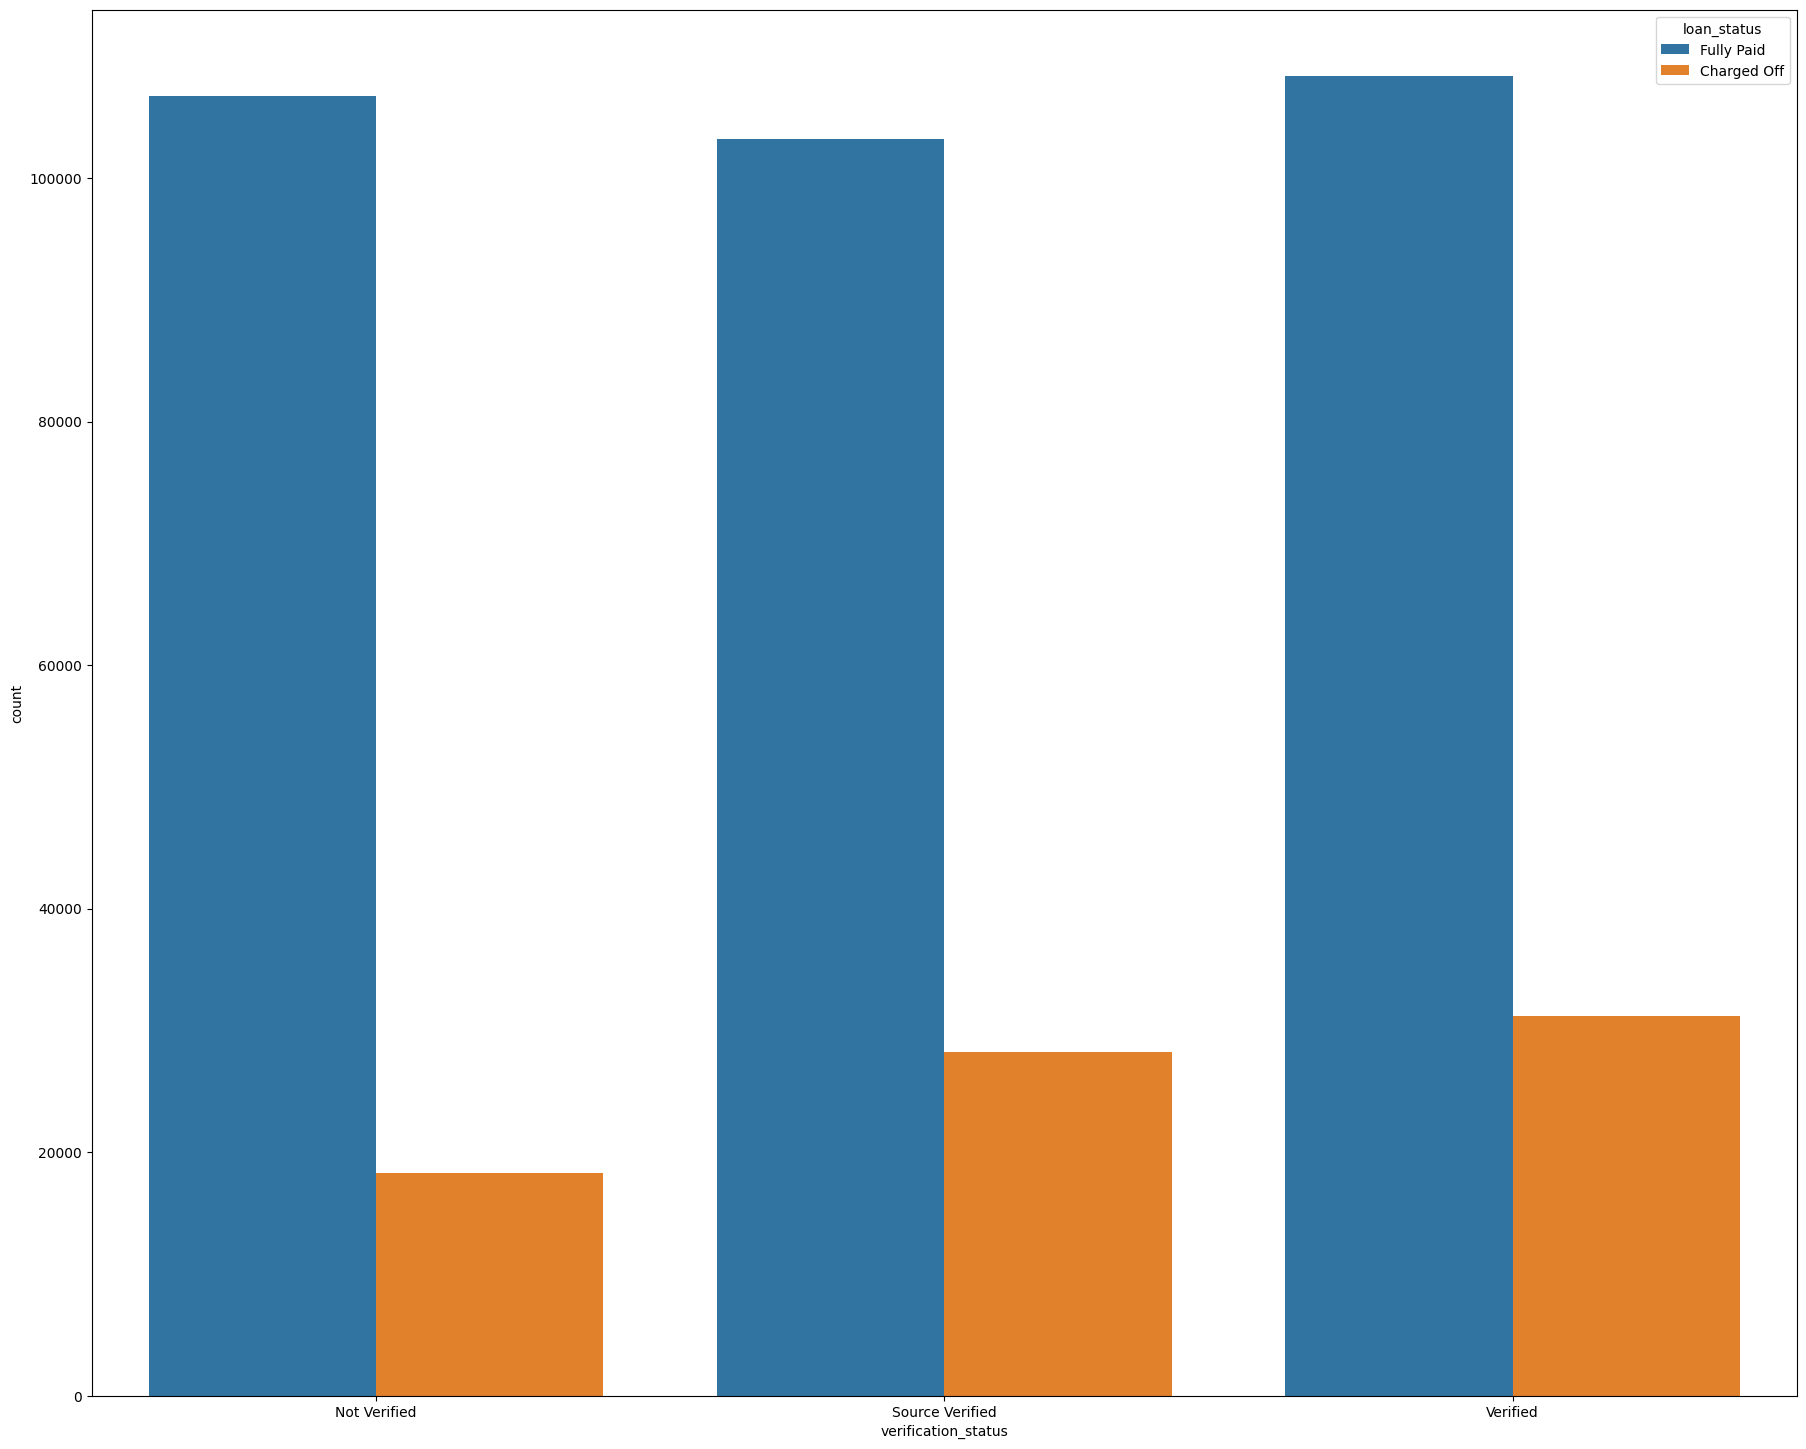

In [23]:
#checking for relationship between the verification_status and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'verification_status',
    hue="loan_status",
data = df)
plt.show()

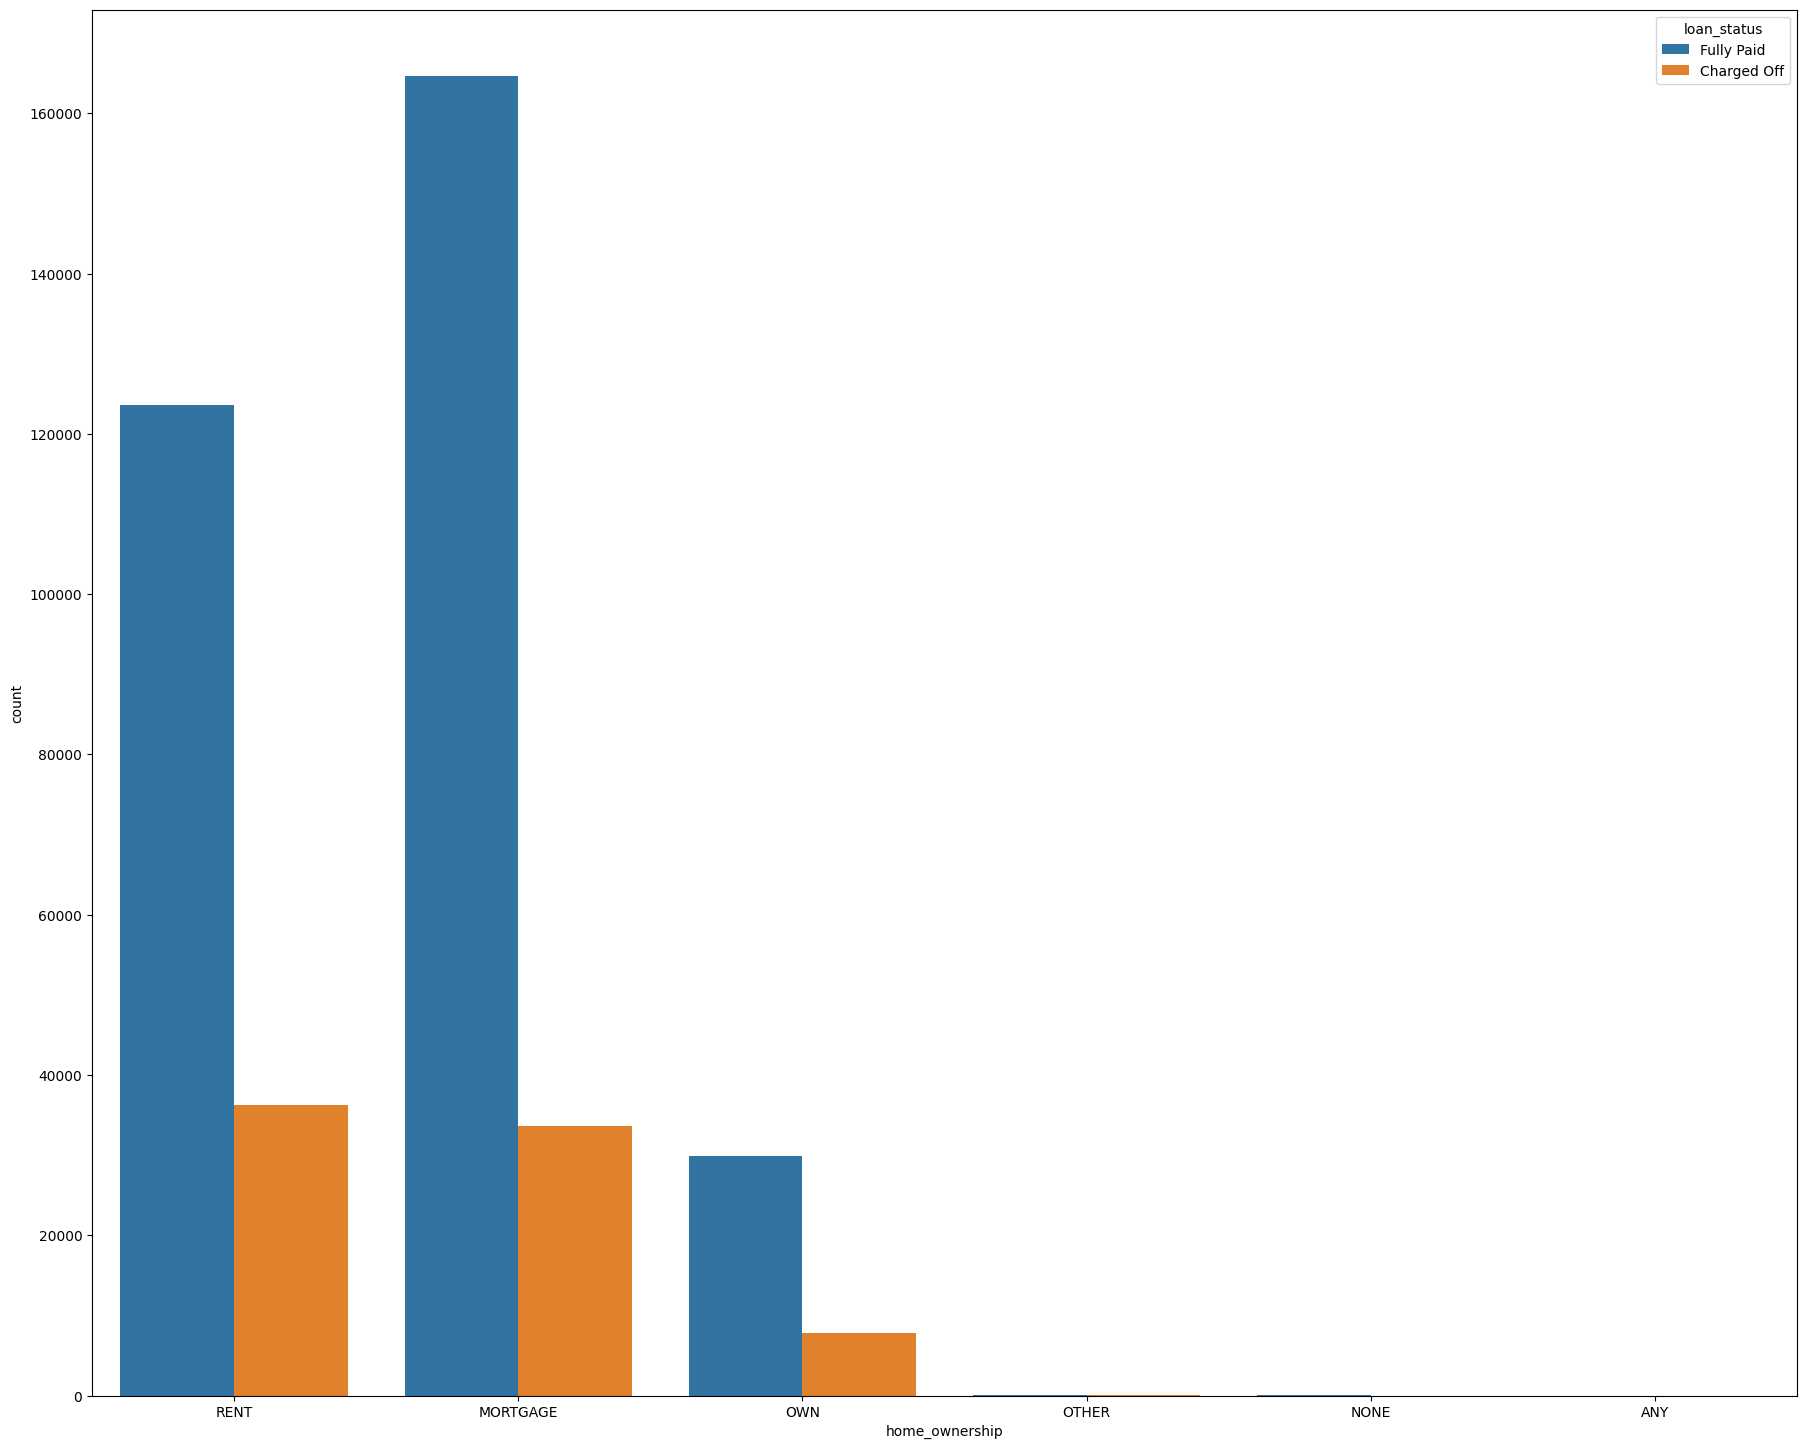

In [24]:
#checking for relationship between the home_ownership  and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'home_ownership',
    hue="loan_status",
data = df)
plt.show()

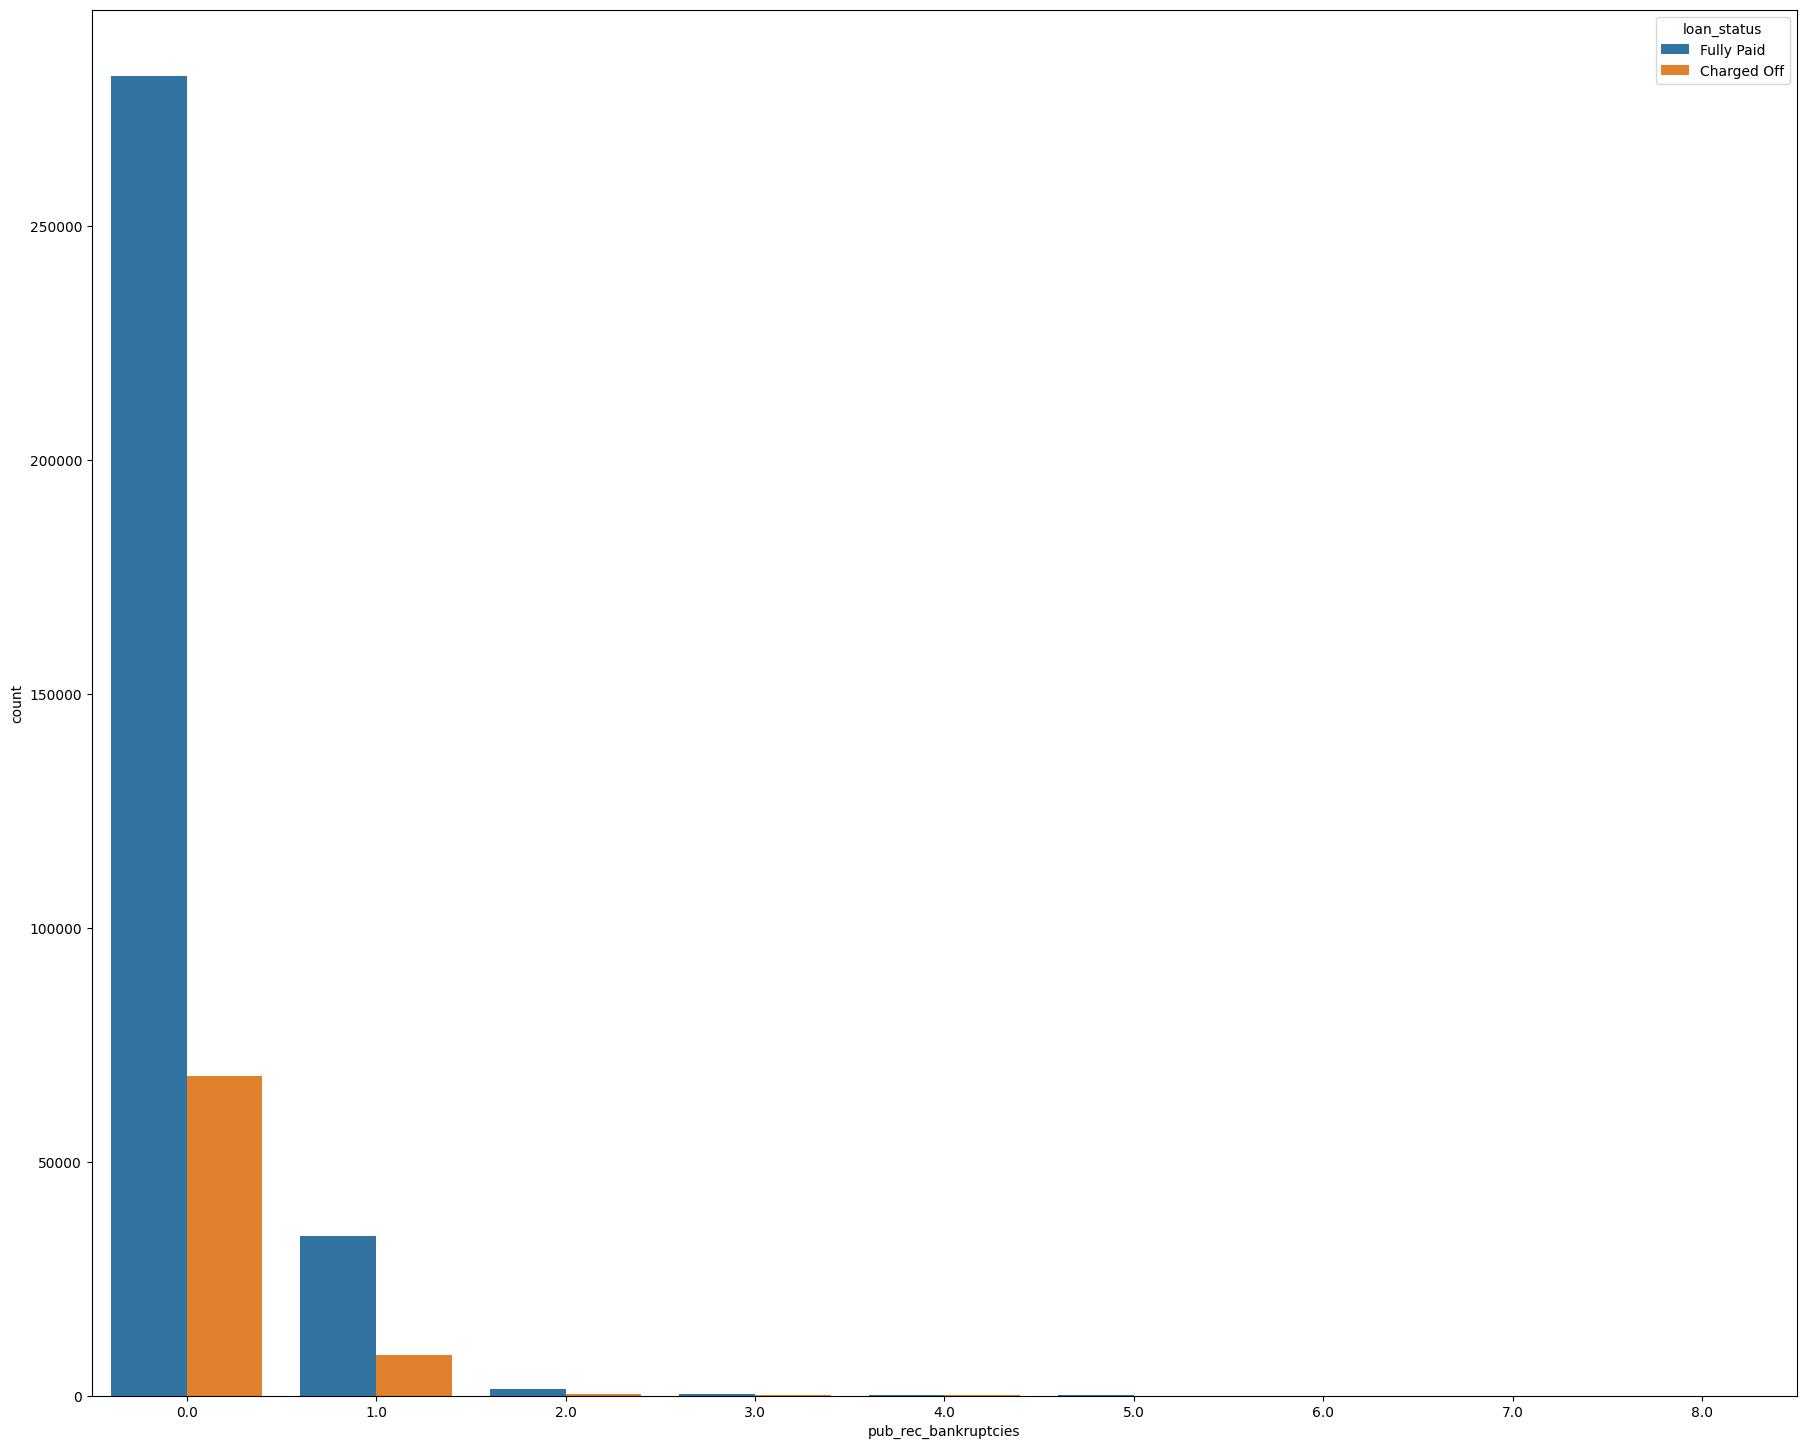

In [25]:
#checking for relationship between the pub_rec_bankruptcies and loan status
plt.figure(figsize =  (22,18))
sns.countplot(
    x = 'pub_rec_bankruptcies',
    hue="loan_status",
data = df)
plt.show()

In [26]:
#creating an heatmap to visualise the correlation
plt.figure(figsize =  (12,7))
sns.heatmap(df.corr(), annot=True, cmap ='rainbow')

ValueError: could not convert string to float: ' 36 months'

<Figure size 1200x700 with 0 Axes>

## inferences:
from the exploration above, from the above, it shows that there are no duplicate data in the dataset.
it is glaring that the dataset we are using is imbalance fom the loan_status as many customers fully paid their loans and this can cause a false prediction since the training set would contain more fully paid than a balanced set, hence we would work on it inorder for the ML to predict unbaisedly.
it is also noticed that verification status has no effect on the loan status, it also shows from the loan term that more people go for the shorter term loan than the longer one. from the exploration, it can be seen that the emp_length has no much effect on the loan amount likewise the emp_title, features that do not have much effect on the loan_amount would be dropped inorder to make the model more effective    

## DATA CLEANING

In [27]:
df["title"].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [28]:
df["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

In [29]:
df["mort_acc"].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [30]:
df["mort_acc"].unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [31]:
df["mort_acc"].describe()

count    358235.000000
mean          1.813991
std           2.147930
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          34.000000
Name: mort_acc, dtype: float64

In [32]:
#filling in the missing values using mean,median and mode
df["mort_acc"] = df['mort_acc'].fillna(np.mean(df['mort_acc']))

df["revol_util"] = df['revol_util'].fillna(np.mean(df['revol_util']))

df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(np.mean(df["pub_rec_bankruptcies"]))



In [33]:
#dropping the employment title, title and employment length
df.drop("emp_title", axis = 1, inplace = True)

df.drop("emp_length", axis = 1, inplace = True)


df.drop("title", axis = 1, inplace = True)

In [34]:
#rechecking for missing values
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [35]:
df["home_ownership"] = df["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [36]:
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [37]:
df["address"]

0                 0174 Michelle Gateway\nMendozaberg, OK 22690
1              1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2              87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                        823 Reid Ford\nDelacruzside, MA 00813
4                         679 Luna Roads\nGreggshire, VA 11650
                                  ...                         
396025          12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA 05113
396027        953 Matthew Points Suite 414\nReedfort, NY 70466
396028      7843 Blake Freeway Apt. 229\nNew Michael, FL 29597
396029             787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [38]:
df["application_type"].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [39]:
df["application_type"] = df["application_type"].replace(["JOINT", "DIRECT_PAY"], "OTHER")

df["application_type"].value_counts()

application_type
INDIVIDUAL    395319
OTHER            711
Name: count, dtype: int64

In [45]:
#extracting information from the address using lambda
df["address"].apply(lambda x:x[-5:])

df["zip_code"]= df["address"].apply(lambda x:x[-5:])

df["zip_code"]=pd.to_numeric(df["zip_code"])

In [40]:
#extracting information from the address using lambda
df["earliest_cr_line"]= df["earliest_cr_line"].apply(lambda x:x[-4:])


df["earliest_cr_line"]=pd.to_numeric(df["earliest_cr_line"])

In [41]:
#extracting information from the pub_recusing lambda
df["pub_rec"]= df["pub_rec"].apply(lambda x: 0 if x==0 else 1)



In [42]:

#converting the loan_status to numerical data and renaming the loan status the target variable
df["loan_status"]= df["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)

In [44]:
#extracting information from the address using lambda
df["issue_d"]= df["issue_d"].apply(lambda x:x[-4:])

df["issue_d"]=pd.to_numeric(df["issue_d"])

In [43]:
#converting categorical variabe term int0 numerical values
df["term"]= df["term"].apply(lambda x: int(x[:3]))


In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,revol_bal,total_acc,initial_list_status,application_type,mort_acc,zip_code
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,2015,1,vacation,26.24,1990,16.0,36369.0,25.0,w,INDIVIDUAL,0.0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,2015,1,debt_consolidation,22.05,2004,17.0,20131.0,27.0,f,INDIVIDUAL,3.0,5113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,2015,1,credit_card,12.79,2007,13.0,11987.0,26.0,f,INDIVIDUAL,0.0,5113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,2014,1,credit_card,2.60,2006,6.0,5472.0,13.0,f,INDIVIDUAL,0.0,813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,2013,0,credit_card,33.95,1999,13.0,24584.0,43.0,f,INDIVIDUAL,1.0,11650


In [50]:
#considering features to drop: subgrade,address,revol_util, pub_rec_bankruptcies
#dropping the subgrade,address, pub_rec_bankruptcies, revol_util


#df.drop("address", axis = 1, inplace = True)

#df.drop("pub_rec_bankruptcies", axis = 1, inplace = True)

#df.drop("revol_util", axis = 1, inplace = True)

#df.drop("pub_rec", axis =1, inplace = True)

df.drop("initial_list_status", axis=1, inplace = True)

df.drop("application_type", axis =1 , inplace = True)


In [51]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,revol_bal,total_acc,mort_acc,zip_code
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,2015,1,vacation,26.24,1990,16.0,36369.0,25.0,0.0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,2015,1,debt_consolidation,22.05,2004,17.0,20131.0,27.0,3.0,5113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,2015,1,credit_card,12.79,2007,13.0,11987.0,26.0,0.0,5113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,2014,1,credit_card,2.60,2006,6.0,5472.0,13.0,0.0,813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,2013,0,credit_card,33.95,1999,13.0,24584.0,43.0,1.0,11650


In [52]:
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
revol_bal              0
total_acc              0
mort_acc               0
zip_code               0
dtype: int64

## FEATURE ENGINEERING

In [53]:
#checking the categories of the features
num_data = df.select_dtypes(include = [ int, float])
cat_data =  df.select_dtypes(exclude = [ int, float])

#checking the shape of the data
num_data.shape, cat_data.shape

((396030, 14), (396030, 4))

In [54]:
#checking the numerical features
num_data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,revol_bal,total_acc,mort_acc,zip_code
0,10000.0,36,11.44,329.48,117000.0,2015,1,26.24,1990,16.0,36369.0,25.0,0.0,22690
1,8000.0,36,11.99,265.68,65000.0,2015,1,22.05,2004,17.0,20131.0,27.0,3.0,5113
2,15600.0,36,10.49,506.97,43057.0,2015,1,12.79,2007,13.0,11987.0,26.0,0.0,5113
3,7200.0,36,6.49,220.65,54000.0,2014,1,2.60,2006,6.0,5472.0,13.0,0.0,813
4,24375.0,60,17.27,609.33,55000.0,2013,0,33.95,1999,13.0,24584.0,43.0,1.0,11650


In [55]:
#checking for unique labels of each numerical columns
for col in num_data:
    print(col, ': ', len(num_data[col].unique()), 'labels')

loan_amnt :  1397 labels
term :  2 labels
int_rate :  566 labels
installment :  55706 labels
annual_inc :  27197 labels
issue_d :  10 labels
loan_status :  2 labels
dti :  4262 labels
earliest_cr_line :  65 labels
open_acc :  61 labels
revol_bal :  55622 labels
total_acc :  118 labels
mort_acc :  34 labels
zip_code :  10 labels


In [56]:
#checking the categorical features
cat_data.head()

,grade,home_ownership,verification_status,purpose
0,B,RENT,Not Verified,vacation
1,B,MORTGAGE,Not Verified,debt_consolidation
2,B,RENT,Source Verified,credit_card
3,A,RENT,Not Verified,credit_card
4,C,MORTGAGE,Verified,credit_card


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,zip_code
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,2015,1,vacation,26.24,1990,16.0,0,36369.0,25.0,w,INDIVIDUAL,0.0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,2015,1,debt_consolidation,22.05,2004,17.0,0,20131.0,27.0,f,INDIVIDUAL,3.0,5113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,2015,1,credit_card,12.79,2007,13.0,0,11987.0,26.0,f,INDIVIDUAL,0.0,5113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,2014,1,credit_card,2.60,2006,6.0,0,5472.0,13.0,f,INDIVIDUAL,0.0,813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,2013,0,credit_card,33.95,1999,13.0,0,24584.0,43.0,f,INDIVIDUAL,1.0,11650


In [57]:
#checking for unique labels of each categorical columns
for col in cat_data:
    print(col, ': ', len(cat_data[col].unique()), 'labels')

grade :  7 labels
home_ownership :  4 labels
verification_status :  3 labels
purpose :  14 labels


In [59]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,revol_bal,total_acc,mort_acc,zip_code
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,2015,1,vacation,26.24,1990,16.0,36369.0,25.0,0.0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,2015,1,debt_consolidation,22.05,2004,17.0,20131.0,27.0,3.0,5113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,2015,1,credit_card,12.79,2007,13.0,11987.0,26.0,0.0,5113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,2014,1,credit_card,2.60,2006,6.0,5472.0,13.0,0.0,813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,2013,0,credit_card,33.95,1999,13.0,24584.0,43.0,1.0,11650


In [60]:
cat = df.select_dtypes(["object"]).columns


In [61]:
#converting categorical data into numerical data using a function
def converter(data, var):
    
    converter = {k:i for i, k in enumerate (data[var].unique(), 0)}
    
    data[var] = data[var]. map(converter)
    
    
for var in cat :
    converter(df, var)

In [62]:
df[cat].head

<bound method NDFrame.head of         grade  home_ownership  verification_status  purpose
0           0               0                    0        0
1           0               1                    0        1
2           0               0                    1        2
3           1               0                    0        2
4           2               1                    2        2
...       ...             ...                  ...      ...
396025      0               0                    1        1
396026      2               1                    1        1
396027      0               0                    2        1
396028      2               1                    2        1
396029      2               0                    2        1

[396030 rows x 4 columns]>

In [63]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,revol_bal,total_acc,mort_acc,zip_code
0,10000.0,36,11.44,329.48,0,0,117000.0,0,2015,1,0,26.24,1990,16.0,36369.0,25.0,0.0,22690
1,8000.0,36,11.99,265.68,0,1,65000.0,0,2015,1,1,22.05,2004,17.0,20131.0,27.0,3.0,5113
2,15600.0,36,10.49,506.97,0,0,43057.0,1,2015,1,2,12.79,2007,13.0,11987.0,26.0,0.0,5113
3,7200.0,36,6.49,220.65,1,0,54000.0,0,2014,1,2,2.60,2006,6.0,5472.0,13.0,0.0,813
4,24375.0,60,17.27,609.33,2,1,55000.0,2,2013,0,2,33.95,1999,13.0,24584.0,43.0,1.0,11650


In [64]:
#renaming the loan status the target variable
df.rename(columns = {"loan_status": "Target"}, inplace = True)

In [65]:
df.groupby('Target').mean()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,open_acc,revol_bal,total_acc,mort_acc,zip_code
Target,,,,,,,,,,,,,,,,,
0,15126.300967,45.279827,15.882587,452.703110,2.465876,0.634880,67535.537710,1.165373,2013.810565,2.013312,19.656346,1998.424974,11.602513,15390.454701,24.984152,1.523562,51979.620010
1,13866.878771,40.824169,13.092105,426.761866,1.603147,0.706644,75829.951566,1.005139,2013.584793,2.061748,16.824010,1997.719255,11.240067,15955.327918,25.519800,1.884850,29611.386626


## DATA PREPROCESSING

In [66]:
#init the constants
RANDOM_STATE = 123
TEST_SIZE = 0.25
TARGET = "Target"

In [67]:
# independent features
X = df.drop(columns=TARGET)

# Target/dependent variable
y = df[TARGET]



In [68]:
print(X)

        loan_amnt  term  int_rate  installment  grade  home_ownership   
0         10000.0    36     11.44       329.48      0               0  \
1          8000.0    36     11.99       265.68      0               1   
2         15600.0    36     10.49       506.97      0               0   
3          7200.0    36      6.49       220.65      1               0   
4         24375.0    60     17.27       609.33      2               1   
...           ...   ...       ...          ...    ...             ...   
396025    10000.0    60     10.99       217.38      0               0   
396026    21000.0    36     12.29       700.42      2               1   
396027     5000.0    36      9.99       161.32      0               0   
396028    21000.0    60     15.31       503.02      2               1   
396029     2000.0    36     13.61        67.98      2               0   

        annual_inc  verification_status  issue_d  purpose    dti   
0         117000.0                    0     2015       

In [69]:
X.nunique()

loan_amnt               1397
term                       2
int_rate                 566
installment            55706
grade                      7
home_ownership             4
annual_inc             27197
verification_status        3
issue_d                   10
purpose                   14
dti                     4262
earliest_cr_line          65
open_acc                  61
revol_bal              55622
total_acc                118
mort_acc                  34
zip_code                  10
dtype: int64

In [70]:
print(y)

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: Target, Length: 396030, dtype: int64


In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df
X
y


0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: Target, Length: 396030, dtype: int64

In [72]:
bestfeatures = SelectKBest(score_func = chi2, k= 'all')
fit = bestfeatures.fit(X,y)

In [73]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [74]:
#concat two dataframe for better visualization
featurescores = pd.concat([dfcolumns,dfscores], axis = 1)
featurescores.columns = ['variables', 'score'] #naming the dataframe columns

In [75]:
featurescores

,variables,score
0,loan_amnt,7.017015e+06
1,term,2.972790e+04
2,int_rate,3.564672e+04
3,installment,9.729833e+04
4,grade,2.622137e+04
5,home_ownership,4.643118e+02
6,annual_inc,5.789023e+07
7,verification_status,1.546566e+03
8,issue_d,1.580577e+00
9,purpose,7.137798e+01


In [76]:
#printing the top 10 best features
print(featurescores.nlargest(100, 'score'))

              variables         score
16             zip_code  9.188840e+08
6            annual_inc  5.789023e+07
0             loan_amnt  7.017015e+06
13            revol_bal  1.257415e+06
3           installment  9.729833e+04
2              int_rate  3.564672e+04
1                  term  2.972790e+04
10                  dti  2.882095e+04
4                 grade  2.622137e+04
15             mort_acc  4.492907e+03
7   verification_status  1.546566e+03
12             open_acc  7.251644e+02
14            total_acc  7.049050e+02
5        home_ownership  4.643118e+02
9               purpose  7.137798e+01
11     earliest_cr_line  1.556521e+01
8               issue_d  1.580577e+00


In [98]:
df.drop("issue_d", axis= 1, inplace = True)

df.drop("earliest_cr_line", axis =1, inplace = True)

In [99]:
RANDOM_STATE = 123
TEST_SIZE = 0.25
TARGET = "Target"

In [100]:
# independent features
X = df.drop(columns=TARGET)

# Target/dependent variable
y = df[TARGET]



In [101]:
X.nunique()

loan_amnt               1397
term                       2
int_rate                 566
installment            55706
grade                      7
home_ownership             4
annual_inc             27197
verification_status        3
purpose                   14
dti                     4262
open_acc                  61
revol_bal              55622
total_acc                118
mort_acc                  34
zip_code                  10
dtype: int64

In [102]:
print(y)

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: Target, Length: 396030, dtype: int64


In [103]:
#test-train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify = y, random_state=RANDOM_STATE, 
)

X.shape, X_train.shape, X_test.shape

((396030, 15), (297022, 15), (99008, 15))

In [104]:
scaler = MinMaxScaler()

In [105]:
scaler.fit(X)

MinMaxScaler()

## MODEL TRAINING

In [106]:
#classify function
def classify(models, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify = y, random_state=RANDOM_STATE,)
    
    model.fit(X_train, y_train)
    print("Accuracy is ", model.score(X_test, y_test)*100)

#cross validation is used for validating the model

    cv_score = cross_val_score(model, X, y, cv= 5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
        
    print('Cross Validation accuracies for the', model , '=', cv_score)
    print('Accuracy score of the ', model, '=', mean_accuracy, '%')
    print('---------------------------------------------------------------------------------')
        
    
    
        
       
    


In [107]:
#LOGISTIC REGRESSION MODEL
model = LogisticRegression()

#fit
model.fit(X, y)

classify(model, X, y)

#make prediction
model.predict(X)

Accuracy is  82.41758241758241
Cross Validation accuracies for the LogisticRegression() = [0.82723531 0.8268313  0.82535414 0.82641467 0.82386435]
Accuracy score of the  LogisticRegression() = 82.59 %
---------------------------------------------------------------------------------


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [108]:
# DecisionTreeClassifier MODEL
model =  DecisionTreeClassifier()

#fit
model.fit(X, y)

#make prediction
model.predict(X)

classify(model, X, y)

Accuracy is  82.89229153199742
Cross Validation accuracies for the DecisionTreeClassifier() = [0.82935636 0.83203293 0.83219706 0.82964674 0.8300255 ]
Accuracy score of the  DecisionTreeClassifier() = 83.07 %
---------------------------------------------------------------------------------


In [109]:
#make prediction
model.predict(X)


array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [111]:
def CMatrix(CM, labels = [ 'charged off','fully paid']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis = 1)
    return df

In [112]:
metrics = pd.DataFrame(index = ['accuracy', 'precision', 'recall'],
                       columns = ['NULL', 'LogisticReg', 'ClassTree',])


In [113]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL']= accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall','NULL']=recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,charged off,fully paid,Total
TRUE,,,
charged off,0,19418,19418
fully paid,0,79590,79590
Total,0,99008,99008


## LOGISTIC REGRESSION MODEL

In [ ]:
#import the estimator model
from sklearn.linear_model import LogisticRegression

#creating an instance
logistic_regression= LogisticRegression(n_jobs = -1, random_state = 123)

#use the training data to train the estimator
logistic_regression.fit(X_train, y_train)

#evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg']= accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall','LogisticReg']=recall_score(y_pred = y_pred_test, y_true = y_test)

#confusion matrix
CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
CMatrix(CM)


PREDICTION,charged off,fully paid,Total
TRUE,,,
charged off,5708,13710,19418
fully paid,2347,77243,79590
Total,8055,90953,99008


## CLASSIFICATION TREES MODEL

In [114]:
#import the estimator model kit
from sklearn.tree import DecisionTreeClassifier

#creating an instance
class_tree= DecisionTreeClassifier(min_samples_split = 30,min_samples_leaf = 10, random_state = 123)

#use the training data to train the estimator
class_tree.fit(X_train, y_train)

#evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree']= accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall','ClassTree']=recall_score(y_pred = y_pred_test, y_true = y_test)

#confusion matrix
CM = confusion_matrix(y_pred = y_pred_test, y_true = y_test)
CMatrix(CM)

PREDICTION,charged off,fully paid,Total
TRUE,,,
charged off,10804,8614,19418
fully paid,5276,74314,79590
Total,16080,82928,99008


In [115]:
import pickle

In [117]:
filename = 'loan_prediction_model'
pickle.dump(class_tree,open(filename,'wb'))

In [119]:
X.nunique()

loan_amnt               1397
term                       2
int_rate                 566
installment            55706
grade                      7
home_ownership             4
annual_inc             27197
verification_status        3
purpose                   14
dti                     4262
open_acc                  61
revol_bal              55622
total_acc                118
mort_acc                  34
zip_code                  10
dtype: int64

In [120]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,Target,purpose,dti,open_acc,revol_bal,total_acc,mort_acc,zip_code
0,10000.0,36,11.44,329.48,0,0,117000.0,0,1,0,26.24,16.0,36369.0,25.0,0.0,22690
1,8000.0,36,11.99,265.68,0,1,65000.0,0,1,1,22.05,17.0,20131.0,27.0,3.0,5113
2,15600.0,36,10.49,506.97,0,0,43057.0,1,1,2,12.79,13.0,11987.0,26.0,0.0,5113
3,7200.0,36,6.49,220.65,1,0,54000.0,0,1,2,2.60,6.0,5472.0,13.0,0.0,813
4,24375.0,60,17.27,609.33,2,1,55000.0,2,0,2,33.95,13.0,24584.0,43.0,1.0,11650


In [123]:
input_data= (25000,36,6.62,767.60,0, 0, 65000.0, 2, 1, 12.79, 16.0, 11148.0, 32.0, 2.0, 70466)


#converting the input_data to numpy array

input_data_to_numpy_array= np.asarray(input_data)

#reshapening the array

input_data_reshaped = input_data_to_numpy_array.reshape(1, -1)

#standardise the input_data


std_data = scaler.transform(input_data_reshaped)

print(std_data)


input_data_df = pd.DataFrame(std_data)

prediction = class_tree.predict(input_data_df)


if (prediction[0] == 0):
    print("defaulter")
else:
    print ("non_defaulter")

[[0.62025316 0.         0.05064277 0.49516054 0.         0.
  0.00746562 1.         0.07692308 0.00127913 0.17777778 0.00639489
  0.20134228 0.05882353 0.74986812]]
non_defaulter


In [122]:
df.to_csv('Loan_dataset.csv')

In [124]:
df.dtypes

loan_amnt              float64
term                     int64
int_rate               float64
installment            float64
grade                    int64
home_ownership           int64
annual_inc             float64
verification_status      int64
Target                   int64
purpose                  int64
dti                    float64
open_acc               float64
revol_bal              float64
total_acc              float64
mort_acc               float64
zip_code                 int64
dtype: object

In [ ]:
100 * metrics

,NULL,LogisticReg,ClassTree
accuracy,80.387443,83.782119,86.177885
precision,80.387443,84.926281,89.848237
recall,100.0,97.051137,93.353436


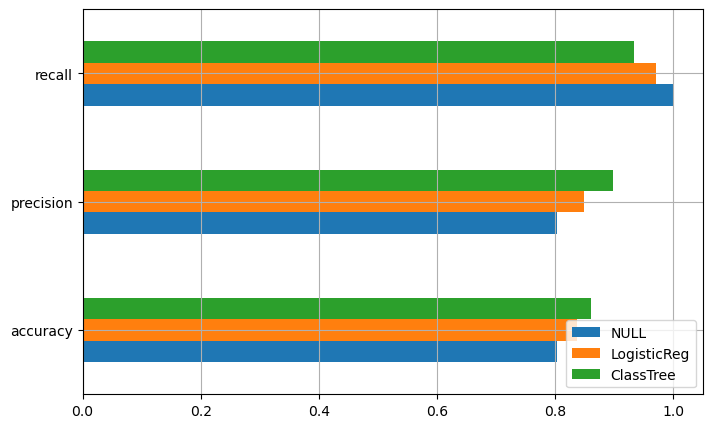

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
metrics.plot(kind='barh', ax = ax)
ax.grid();

In [ ]:
y_test.value_counts(normalize = True)

1    0.803874
0    0.196126
Name: Target, dtype: float64

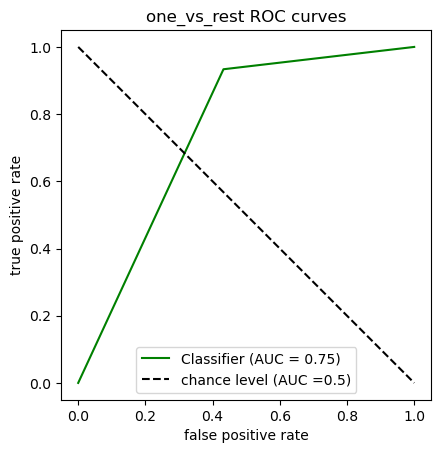

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
y_true = y_test, y_pred = y_pred_test,

color = 'green',)

plt.plot([0,1],[1,0], "k--", label = "chance level (AUC =0.5)")
plt.axis("square")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("one_vs_rest ROC curves")
plt.legend()
plt.show()

## HYPERPARAMETER TUNING

In [ ]:
#LOGISTIC REGRESSION MODEL
model = LogisticRegression(max_iter=1000)

#fit
model.fit(X, y)


classify(model, X, y)

Accuracy is  83.78211861667744
Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.83758806 0.83802995 0.83699467 0.83712093 0.83566901]
Accuracy score of the  LogisticRegression(max_iter=1000) = 83.71 %
---------------------------------------------------------------------------------


In [ ]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='none',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000),
    LogisticRegression(solver='sag',penalty='none',max_iter=1000),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    #fp, tp, th = RocCurve(y_true = y_test, y_pred = y_pred_test,)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    #clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall
2,0.84724,0.84745,0.84333,0.99509
3,0.84357,0.84303,0.83762,0.99827
1,0.83690,0.83782,0.84926,0.97051
0,0.83682,0.83652,0.84984,0.96760


## STIMULATE PRODUCTION USAGE

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,zip_code,Target
0,10000.0,36,11.44,329.48,0,0,117000.0,0,0,0,26.24,0,16.0,0,36369.0,25.0,0,0,0.0,0,1
1,8000.0,36,11.99,265.68,0,1,65000.0,0,0,1,22.05,1,17.0,0,20131.0,27.0,1,0,3.0,1,1
2,15600.0,36,10.49,506.97,0,0,43057.0,1,0,2,12.79,2,13.0,0,11987.0,26.0,1,0,0.0,2,1
3,7200.0,36,6.49,220.65,1,0,54000.0,0,1,2,2.60,3,6.0,0,5472.0,13.0,1,0,0.0,3,1
4,24375.0,60,17.27,609.33,2,1,55000.0,2,2,2,33.95,4,13.0,0,24584.0,43.0,1,0,1.0,4,0


In [ ]:
unknown_data = {
    "loan_amnt":24375.0,
"term " :36,
"int_rate": 17.27,
"installment":609.33,
"grade ": 2,                 
"home_ownership" : 1,             
"annual_inc": 550000,             
"verification_status": 2,        
"issue_d": 2,          
"purpose ": 2,                 
"dti": 33.95,                    
"earliest_cr_line":4,
"open_acc": 13.0,
"pub_rec" :0 ,
"revol_bal": 24584.0,
"total_acc": 43.0,
"initial_list_status": 1,
"application_type": 0, 
"mort_acc": 1.0,
"zip_code": 4,}

df = pd.DataFrame(data = unknown_data, index = [0])
df

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,Target
0,24375.0,36,17.27,609.33,2,1,55000.0,2,2,2,33.95,4,13.0,0,24584.0,43.0,1,0,1.0,0


In [ ]:
mapper = {0: "charged off", 1: "Fully paid"}

result = logistic_regression.predict(df)[0]

mapper.get(result)


'charged off'

In [ ]:
mapper = {0: "charged off", 1: "Fully paid"}

result = class_tree.predict(df)[0]

mapper.get(result)

'Fully paid'

In [ ]:
another_unknown_data = {
    "loan_amnt":10000.0,
"term " :36,
"int_rate": 11.44,
"installment":329.48,
"grade ": 0,                 
"home_ownership" : 0,             
"annual_inc": 117000.0,             
"verification_status": 0,        
"issue_d": 0,          
"purpose ": 0,                 
"dti": 26.24,                    
"earliest_cr_line":0,
"open_acc": 16.0,
"pub_rec" :0 ,
"revol_bal": 36369.0,
"total_acc": 25.0,
"initial_list_status": 0,
"application_type": 0, 
"mort_acc": 0.0,
"Target": 1
}

df = pd.DataFrame(data =another_unknown_data, index = [0])
df

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,Target
0,10000.0,36,11.44,329.48,0,0,117000.0,0,0,0,26.24,0,16.0,0,36369.0,25.0,0,0,0.0,1


In [ ]:
mapper = {0: "charged off", 1: "Fully paid"}

result = logistic_regression.predict(df)[0]

mapper.get(result)


'charged off'

In [ ]:
mapper = {0: "charged off", 1: "Fully paid"}

result = class_tree.predict(df)[0]

mapper.get(result)

'Fully paid'

In [ ]:
MinMaxScaler_data= scaler.transform(X_test)

In [ ]:
print(MinMaxScaler_data)

In [ ]:
X= MinMaxScaler_data
y = df[TARGET]